This project has two parts. In the first part, you will run a
regression, and identify and remove the 10% of points that have the
largest residual errors. Then you’ll remove those outliers from the
dataset and refit the regression, just like the strategy that
Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers
in the Enron finance data, and learn if/how to remove them.


### 1

Sebastian described to us an algorithm for improving a regression,
which you will implement in this project. You will work through it in
the next few quizzes. To summarize, what you'll do is fit the
regression on all training points discard the 10% of points that have
the largest errors between the actual y values, and the
regression-predicted y values refit on the remaining points.

Start by running the starter code
(outliers/outlier_removal_regression.py) and visualizing the points. A
few outliers should clearly pop out. Deploy a linear regression, where
net worth is the target and the feature being used to predict it is a
person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know
this because we used this value to generate the data); 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

###from outlier_cleaner import outlierCleaner

In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = np.reshape( np.array(ages), (len(ages), 1))
net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(
    ages, net_worths, test_size=0.1, random_state=42)

In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### what slope does your regression have?


In [5]:
print(reg.coef_)[0][0]

5.07793064344


### What is the score you get when using your regression to make predictions with the test data?


In [6]:
pred_test = reg.predict(ages_test)
### WRONG reg.score(pred_test, net_worths_test)
reg.score(ages_test, net_worths_test)

0.8782624703664671

### 3

In outliers/outlier_cleaner.py, you will find the skeleton for a
function called outlierCleaner() that you will fill in with a cleaning
algorithm. It takes three arguments: predictions is a list of
predicted targets that come from your regression, ages is the list of
ages in the training set, and net_worths is the actual value of the
net worths in the training set. There should be 90 elements in each of
these lists (because the training set has 90 points in it). Your job
is to return a list called cleaned_data that has only 81 elements in
it, which are the 81 training points where the predictions and the
actual values (net_worths) have the smallest errors (90 * 0.9 =
81). The format of cleaned_data should be a list of tuples, where each
tuple has the form (age, net_worth, error).

Once this cleaning function is working, you should see the regression
result changes. What is the new slope? Is it closer to the “correct”
result of 6.25?

In [10]:
import math

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errs = abs(predictions-net_worths)
    N = int(len(errs)*0.9)
    ranks = np.argsort(errs, axis=0)
    cleaned_data = [(ages[ranks][n][0][0], net_worths[ranks][n][0][0], errs[ranks][n][0][0]) for n in range(N)]
    return cleaned_data

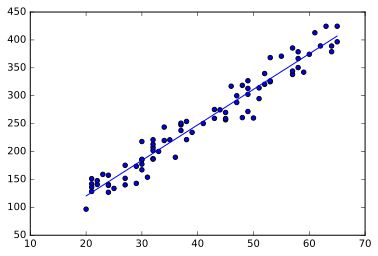

In [11]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"
    


[[ 6.36859481]]
0.983189455396


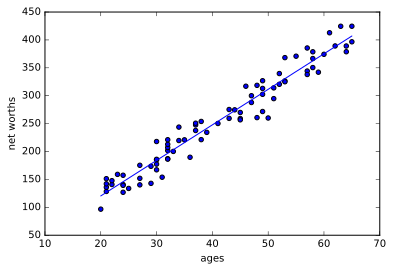

In [12]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = np.reshape( np.array(ages), (len(ages), 1))
    net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        # What is the new slope? Is it closer to the “correct” result of 6.25?
        print(reg.coef_)
        # What’s the new score when you use the regression to make predictions on the test set?
        print(reg.score(ages_test, net_worths_test))
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"